Import needed libraries

In [107]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import re
import os
import tokenizermodule as tm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

Import excel file with our input data

In [108]:
df = pd.read_excel("oneandtwowithfilepathtest.xlsx")

Split the data set into features and labels

In [109]:
Y = df["Dialogue Move"]
features = df["Commander"]

Print the labels value counts

In [110]:
print(Y.value_counts())

send image    1023
move           965
turn           893
stop            69
explore          8
Name: Dialogue Move, dtype: int64


Get the number of sentences in the training data

In [111]:
num_sentences = features.size

Clean and parse the feature data

In [112]:
print ("\n Cleaning and parsing the feature data\n")
clean_features = []
for i in range( 0, len(features)):
    if( (i+1)%100 == 0 ):
        print ("Sentence %d of %d\n" % ( i+1, num_sentences )  )  

    clean_features.append(" ".join(tm.processSentence(features[i])))


 Cleaning and parsing the feature data

Sentence 100 of 2958

Sentence 200 of 2958

Sentence 300 of 2958

Sentence 400 of 2958

Sentence 500 of 2958

Sentence 600 of 2958

Sentence 700 of 2958

Sentence 800 of 2958

Sentence 900 of 2958

Sentence 1000 of 2958

Sentence 1100 of 2958

Sentence 1200 of 2958

Sentence 1300 of 2958

Sentence 1400 of 2958

Sentence 1500 of 2958

Sentence 1600 of 2958

Sentence 1700 of 2958

Sentence 1800 of 2958

Sentence 1900 of 2958

Sentence 2000 of 2958

Sentence 2100 of 2958

Sentence 2200 of 2958

Sentence 2300 of 2958

Sentence 2400 of 2958

Sentence 2500 of 2958

Sentence 2600 of 2958

Sentence 2700 of 2958

Sentence 2800 of 2958

Sentence 2900 of 2958



Print the top 5 sentences on the feature set

In [113]:
print(clean_features[:5])

['explore room', 'send picture', 'face door left', 'face closest door left', 'go room']


Create the bag of words model for the feature set, , and convert to a numpy array

In [114]:
print ("Creating the bag of words...\n")
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(clean_features)
X = X.toarray()

Creating the bag of words...



Split features and target into train and test sets

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

Print out the labels value counts for the test data

In [116]:
y_test.value_counts()

send image    307
move          290
turn          268
stop           21
explore         2
Name: Dialogue Move, dtype: int64

Initialize a Random Forest classifier with 100 trees
Fit the forest to the training set.
This may take a few minutes to run

In [117]:
print ("Training the random forest (this may take a while)...")
forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit( X_train, y_train)

Training the random forest (this may take a while)...


Make predictions for the test set

In [118]:
y_pred_test = forest.predict(X_test)

View accuracy score

In [119]:
accuracy_score(y_test, y_pred_test)

0.9673423423423423

View confusion matrix for test data and predictions

In [120]:
confusion_matrix(y_test, y_pred_test)

array([[  0,   2,   0,   0,   0],
       [  0, 277,   2,   3,   8],
       [  0,   3, 303,   0,   1],
       [  0,   2,   0,  19,   0],
       [  0,   5,   3,   0, 260]], dtype=int64)

Get and reshape confusion matrix data

In [121]:
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

Build the plot and add labels to the plot

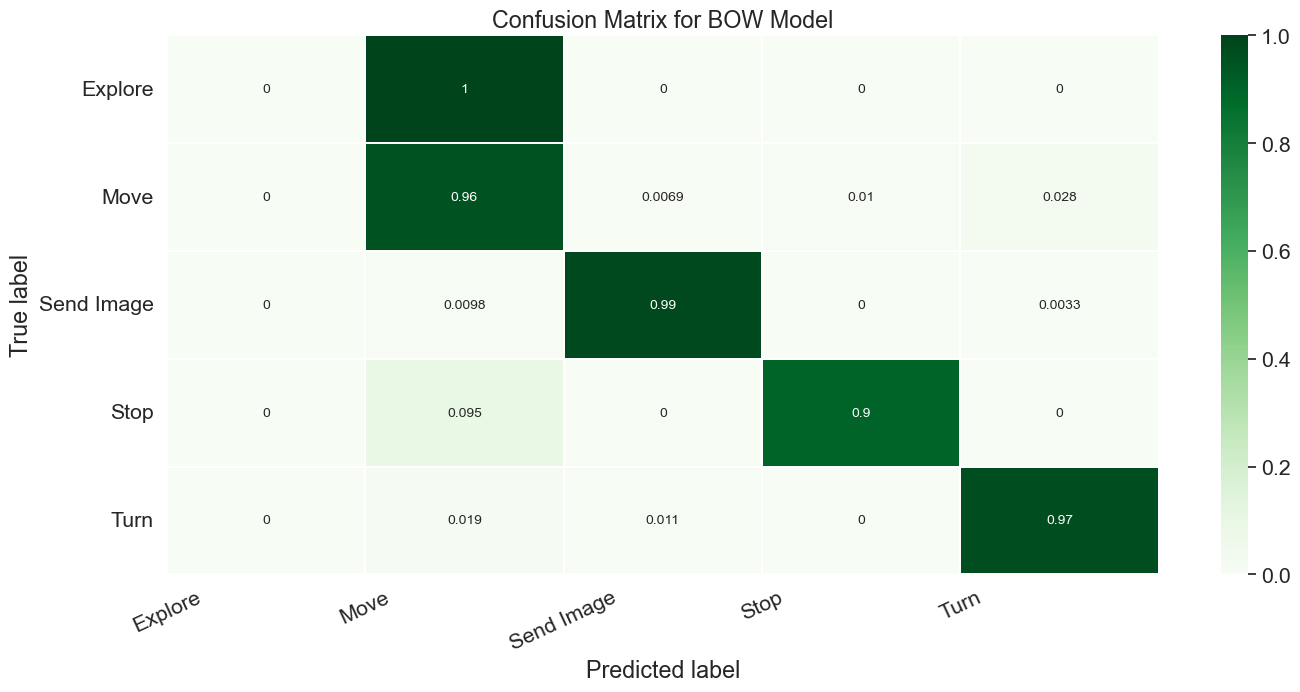

In [122]:
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

class_names = ['Explore', 'Move', 'Send Image', 'Stop', 'Turn']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for BOW Model')
plt.show()

View the classification report for test data and predictions

In [123]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

     explore       0.00      0.00      0.00         2
        move       0.96      0.96      0.96       290
  send image       0.98      0.99      0.99       307
        stop       0.86      0.90      0.88        21
        turn       0.97      0.97      0.97       268

    accuracy                           0.97       888
   macro avg       0.75      0.76      0.76       888
weighted avg       0.97      0.97      0.97       888



C:\Users\EkeleOgbadu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EkeleOgbadu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\EkeleOgbadu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
